# Notebook 1 : Préparation des Données

## Objectifs
- Charger les données du challenge Kaggle Home Credit Default Risk
- Explorer et analyser les données
- Nettoyer et traiter les valeurs manquantes
- Fusionner les différentes tables
- Encoder les variables catégorielles
- Créer de nouvelles features
- Analyser le déséquilibre des classes
- Sauvegarder le dataset préparé

In [1]:
# Imports
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from src.data_prep import (
    load_data,
    check_missing_values,
    handle_missing_values,
    encode_categorical_variables,
    merge_all_tables,
    remove_duplicates
)

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Options d'affichage pandas
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## 1. Chargement des Données

Télécharger les données depuis: https://www.kaggle.com/c/home-credit-default-risk/data

In [2]:
# Charger toutes les tables
dataframes = load_data('../data')

Chargement de application_train.csv...
  Shape: (307511, 122)
Chargement de application_test.csv...
  Shape: (48744, 121)
Chargement de bureau.csv...
  Shape: (1716428, 17)
Chargement de bureau_balance.csv...
  Shape: (27299925, 3)
Chargement de credit_card_balance.csv...
  Shape: (3840312, 23)
Chargement de installments_payments.csv...
  Shape: (13605401, 8)
Chargement de POS_CASH_balance.csv...
  Shape: (10001358, 8)
Chargement de previous_application.csv...
  Shape: (1670214, 37)


In [3]:
# Aperçu des tables chargées
print("Tables disponibles:")
for name, df in dataframes.items():
    print(f"  {name}: {df.shape}")

Tables disponibles:
  application_train: (307511, 122)
  application_test: (48744, 121)
  bureau: (1716428, 17)
  bureau_balance: (27299925, 3)
  credit_card_balance: (3840312, 23)
  installments_payments: (13605401, 8)
  POS_CASH_balance: (10001358, 8)
  previous_application: (1670214, 37)


## 2. Exploration des Données Principales

In [4]:
# Explorer application_train (dataset principal)
df_train = dataframes['application_train'].copy()
print(f"Shape: {df_train.shape}")
print(f"\nPremières lignes:")
df_train.head()

Shape: (307511, 122)

Premières lignes:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
# Informations sur les colonnes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Statistiques descriptives
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

## 3. Analyse de la Variable Cible

TARGET = 1 : Client en défaut de paiement
TARGET = 0 : Client qui rembourse normalement

In [7]:
# Distribution de la variable cible
target_counts = df_train['TARGET'].value_counts()
target_pct = df_train['TARGET'].value_counts(normalize=True) * 100

print("Distribution de TARGET:")
print(f"  0 (Pas de défaut): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Défaut):        {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nRatio de déséquilibre: {target_counts[0] / target_counts[1]:.2f}:1")

Distribution de TARGET:
  0 (Pas de défaut): 282,686 (91.93%)
  1 (Défaut):        24,825 (8.07%)

Ratio de déséquilibre: 11.39:1


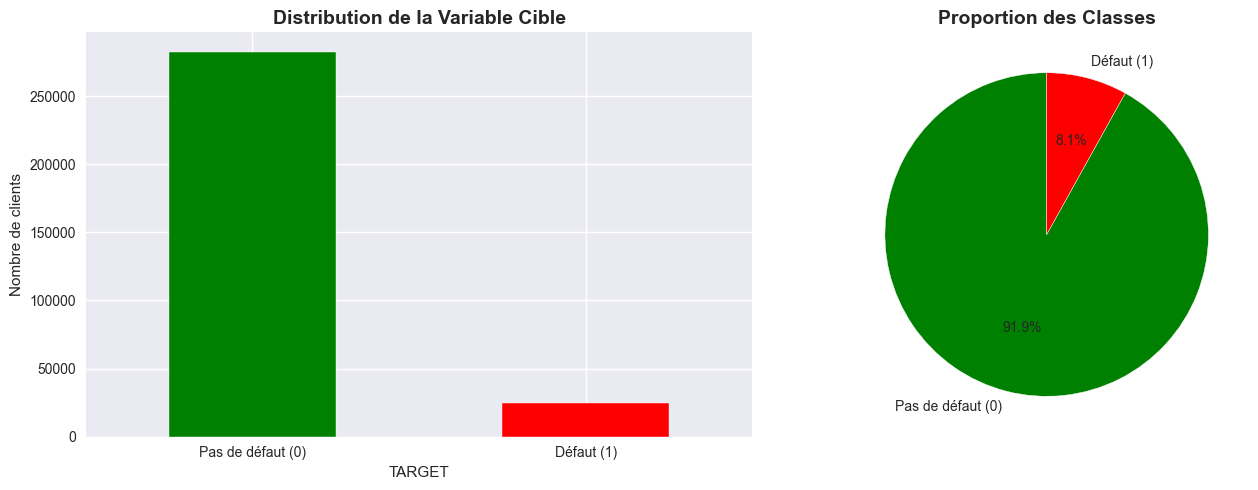

In [8]:
# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
target_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('TARGET')
axes[0].set_ylabel('Nombre de clients')
axes[0].set_xticklabels(['Pas de défaut (0)', 'Défaut (1)'], rotation=0)

# Pie chart
axes[1].pie(target_counts, labels=['Pas de défaut (0)', 'Défaut (1)'],
           autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Analyse des Valeurs Manquantes

In [9]:
# Analyser les valeurs manquantes
missing_stats = check_missing_values(df_train, threshold=0.4)


Colonnes avec plus de 40.0% de valeurs manquantes:
                          column  missing_count  missing_percentage    dtype
76               COMMONAREA_MEDI         214865           69.872297  float64
48                COMMONAREA_AVG         214865           69.872297  float64
62               COMMONAREA_MODE         214865           69.872297  float64
84      NONLIVINGAPARTMENTS_MEDI         213514           69.432963  float64
70      NONLIVINGAPARTMENTS_MODE         213514           69.432963  float64
56       NONLIVINGAPARTMENTS_AVG         213514           69.432963  float64
86            FONDKAPREMONT_MODE         210295           68.386172   object
68         LIVINGAPARTMENTS_MODE         210199           68.354953  float64
82         LIVINGAPARTMENTS_MEDI         210199           68.354953  float64
54          LIVINGAPARTMENTS_AVG         210199           68.354953  float64
66                FLOORSMIN_MODE         208642           67.848630  float64
80                FLOORS

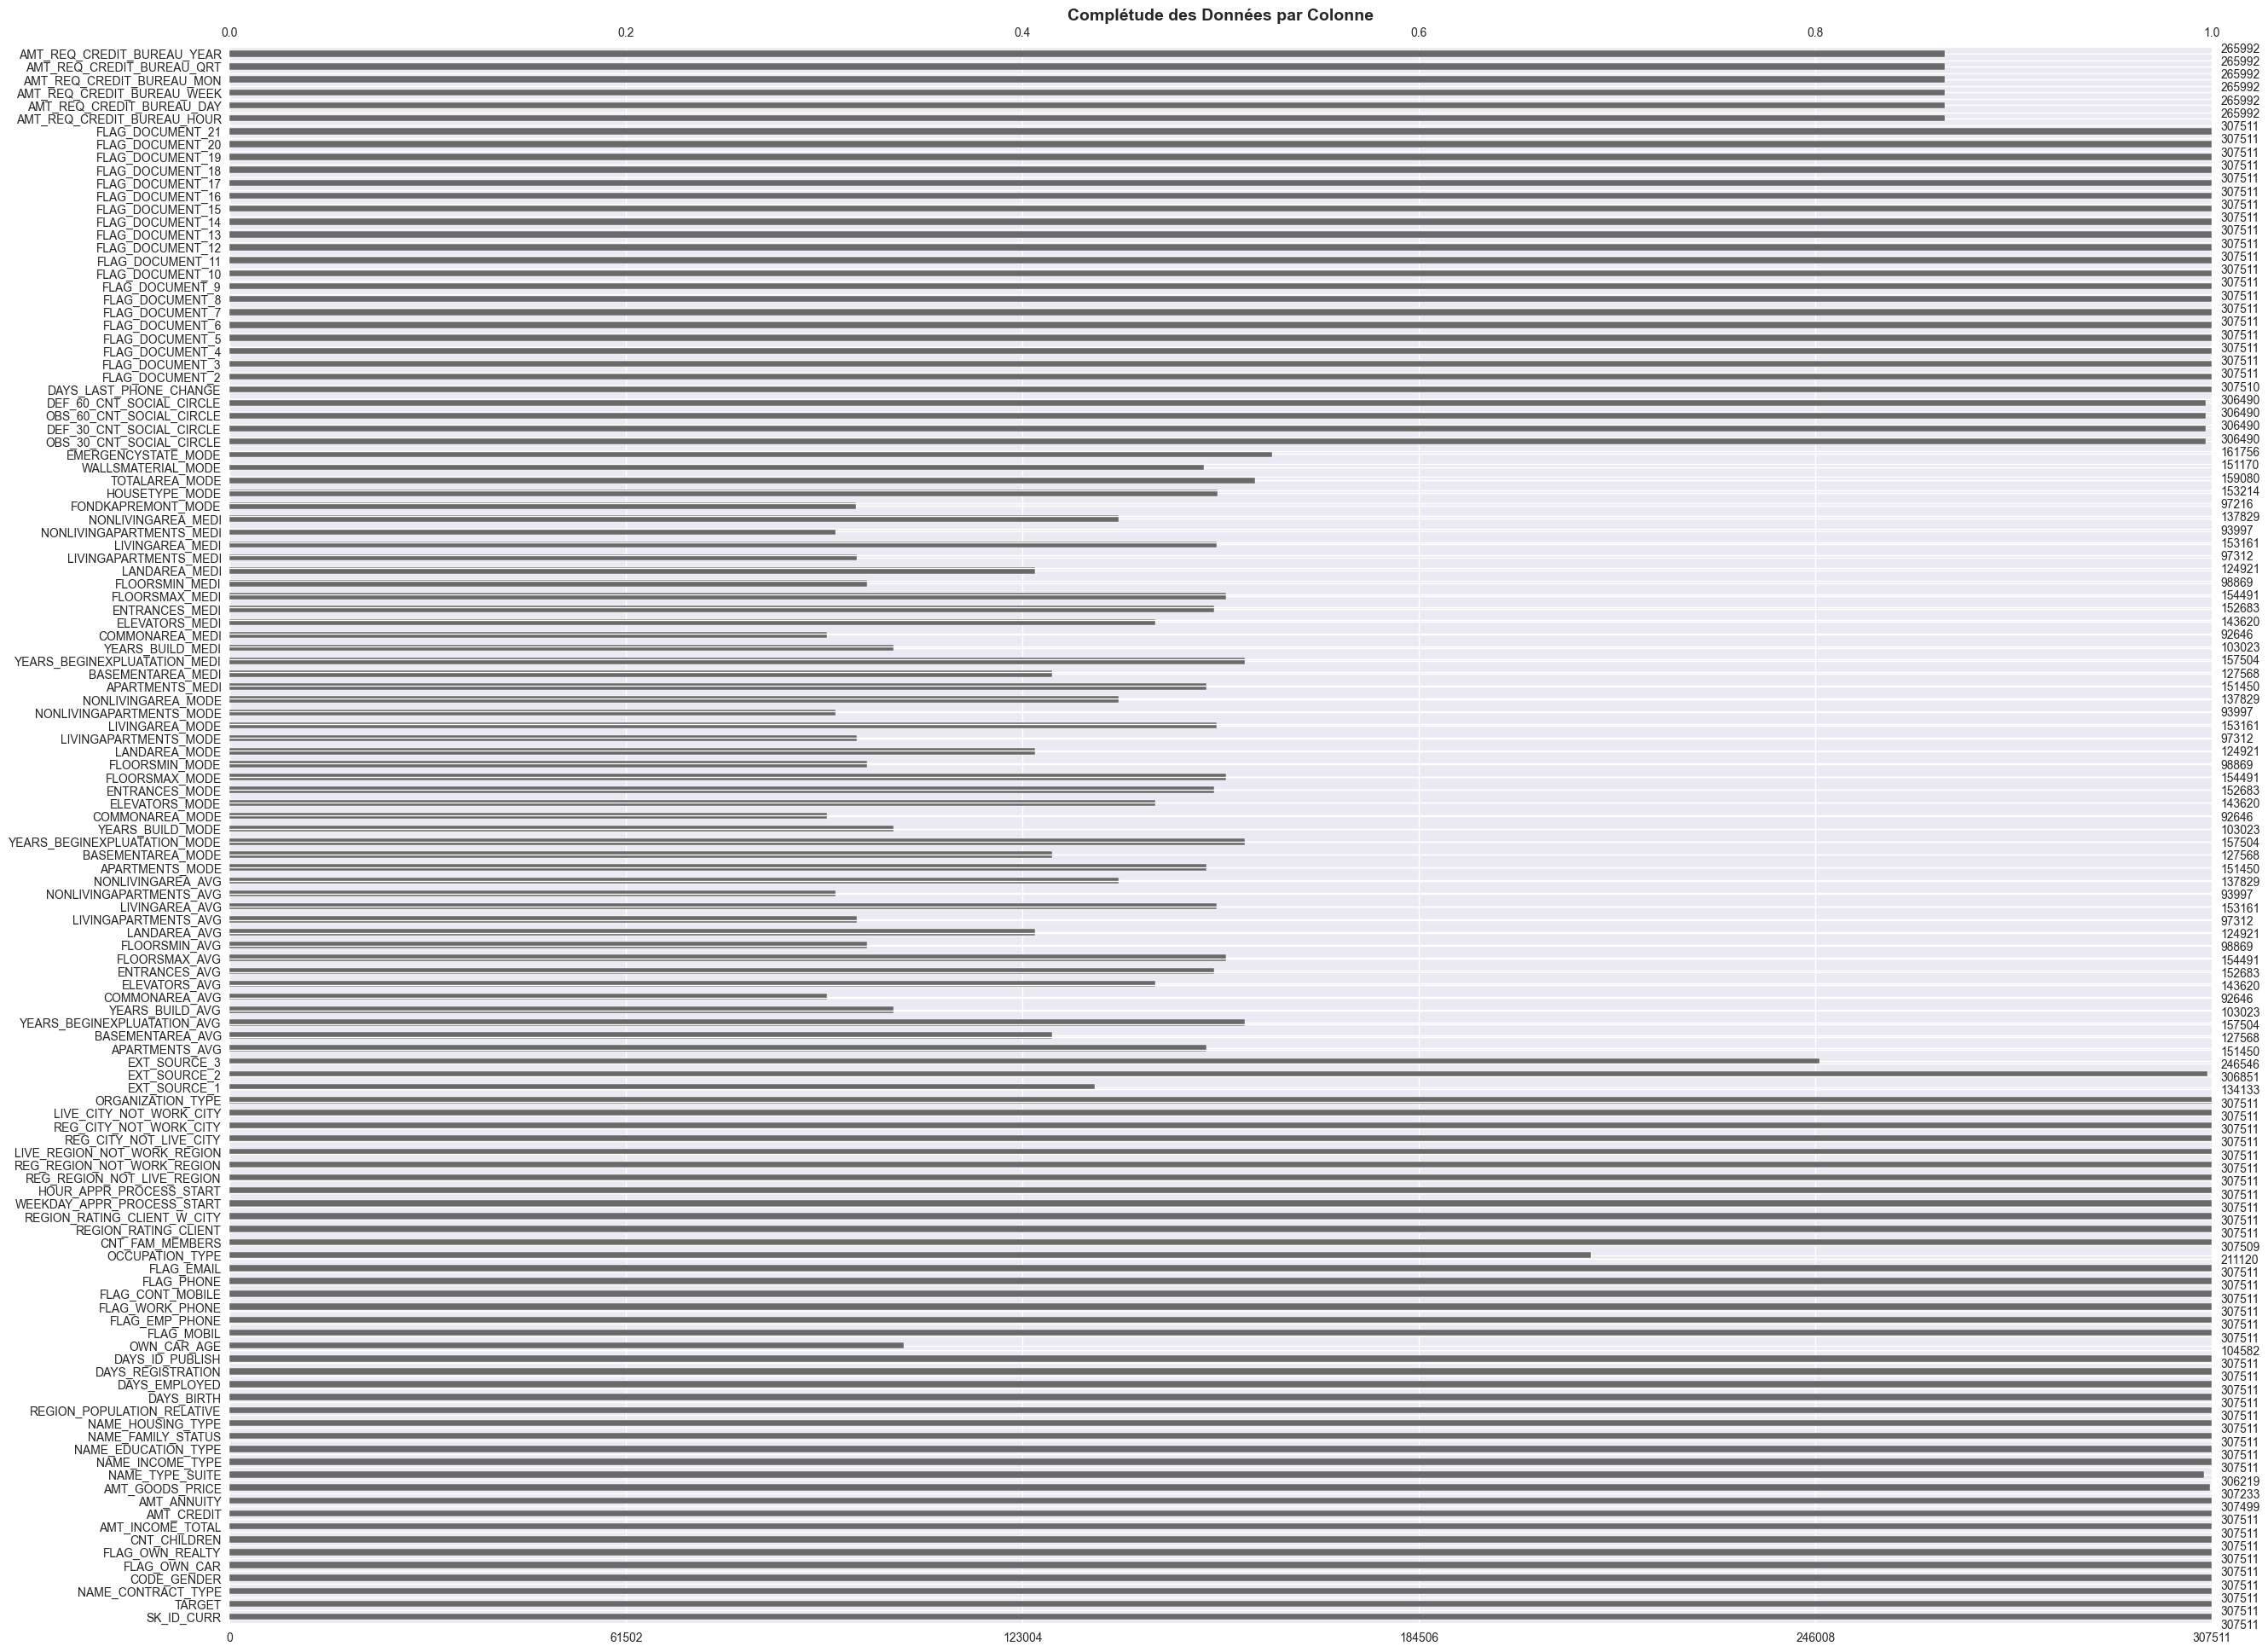

In [10]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(30, 24))
msno.bar(df_train, figsize=(30, 24), fontsize=10)
plt.title('Complétude des Données par Colonne', fontsize=14, fontweight='bold')
plt.show()

## 5. Vérification des Doublons

In [11]:
# Vérifier les doublons
n_duplicates = df_train.duplicated().sum()
print(f"Nombre de lignes dupliquées: {n_duplicates}")

# Vérifier les doublons sur SK_ID_CURR (doit être unique)
n_duplicate_ids = df_train['SK_ID_CURR'].duplicated().sum()
print(f"Nombre d'IDs clients dupliqués: {n_duplicate_ids}")

Nombre de lignes dupliquées: 0
Nombre d'IDs clients dupliqués: 0


## 6. Fusion des Tables

Fusion de toutes les tables secondaires avec application_train en créant des features agrégées.

In [12]:
# Fusionner toutes les tables
print("Fusion de toutes les tables...")
df_merged = merge_all_tables(dataframes)

Fusion de toutes les tables...
Shape initial: (307511, 122)
Après bureau: (307511, 218)
Après previous_application: (307511, 319)
Après installments: (307511, 355)
Après credit_card: (307511, 461)
Après POS_CASH: (307511, 492)


In [13]:
# Aperçu du dataset fusionné
print(f"\nShape après fusion: {df_merged.shape}")
print(f"Nombre de features: {df_merged.shape[1]}")
print(f"\nPremières colonnes:")
print(df_merged.columns.tolist()[:20])


Shape après fusion: (307511, 492)
Nombre de features: 492

Premières colonnes:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']


## 7. Nettoyage des Données

In [14]:
# Suppression des colonnes avec trop de valeurs manquantes (>60%)
threshold = 0.6
missing_pct = df_merged.isnull().sum() / len(df_merged)
cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()

print(f"Colonnes à supprimer (>{threshold*100}% manquantes): {len(cols_to_drop)}")
df_clean = df_merged.drop(columns=cols_to_drop)
print(f"Shape après suppression: {df_clean.shape}")

Colonnes à supprimer (>60.0% manquantes): 160
Shape après suppression: (307511, 332)


In [15]:
# Gérer les valeurs manquantes restantes
print("\nTraitement des valeurs manquantes...")
df_clean = handle_missing_values(df_clean, strategy='median')

# On vérifie qu'il ne reste plus de valeurs manquantes
remaining_missing = df_clean.isnull().sum().sum()
print(f"Valeurs manquantes restantes: {remaining_missing}")


Traitement des valeurs manquantes...
Valeurs manquantes restantes: 0


## 8. Encodage des Variables Catégorielles

In [16]:
# Identification des variables catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Nombre de variables catégorielles: {len(categorical_cols)}")
print(f"Variables: {categorical_cols[:10]}...")

Nombre de variables catégorielles: 15
Variables: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']...


In [17]:
# Encodage des variables catégorielles
print("\nEncodage des variables catégorielles...")
df_encoded, encoders = encode_categorical_variables(df_clean, encoding_type='label')
print(f"Shape après encodage: {df_encoded.shape}")


Encodage des variables catégorielles...
Shape après encodage: (307511, 332)


## 9. Feature Engineering - Nouvelles Features

In [18]:
# Créer quelques features métier
if 'AMT_INCOME_TOTAL' in df_encoded.columns and 'AMT_CREDIT' in df_encoded.columns:
    # Ratio crédit / revenu
    df_encoded['CREDIT_INCOME_RATIO'] = df_encoded['AMT_CREDIT'] / (df_encoded['AMT_INCOME_TOTAL'] + 1)

if 'AMT_ANNUITY' in df_encoded.columns and 'AMT_INCOME_TOTAL' in df_encoded.columns:
    # Ratio annuité / revenu
    df_encoded['ANNUITY_INCOME_RATIO'] = df_encoded['AMT_ANNUITY'] / (df_encoded['AMT_INCOME_TOTAL'] + 1)

if 'DAYS_BIRTH' in df_encoded.columns:
    # Âge en années
    df_encoded['AGE_YEARS'] = -df_encoded['DAYS_BIRTH'] / 365

if 'DAYS_EMPLOYED' in df_encoded.columns:
    # Années d'emploi (gérer les valeurs aberrantes)
    df_encoded['YEARS_EMPLOYED'] = df_encoded['DAYS_EMPLOYED'].apply(
        lambda x: -x/365 if x < 0 else 0
    )

print("Nouvelles features créées!")
print(f"Shape final: {df_encoded.shape}")

Nouvelles features créées!
Shape final: (307511, 336)


## 10. Analyse Exploratoire Rapide

In [19]:
# Corrélation avec TARGET
if 'TARGET' in df_encoded.columns:
    correlations = df_encoded.corr()['TARGET'].sort_values(ascending=False)
    print("\nTop 10 features positivement corrélées avec TARGET:")
    print(correlations.head(11))  # 11 car TARGET est inclus
    print("\nTop 10 features négativement corrélées avec TARGET:")
    print(correlations.tail(10))


Top 10 features positivement corrélées avec TARGET:
TARGET                            1.000000
BUREAU_DAYS_CREDIT_MEAN           0.082079
DAYS_BIRTH                        0.078239
BUREAU_DAYS_CREDIT_MIN            0.067388
BUREAU_DAYS_CREDIT_UPDATE_MEAN    0.064120
REGION_RATING_CLIENT_W_CITY       0.060893
REGION_RATING_CLIENT              0.058899
INSTAL_DAYS_ENTRY_PAYMENT_MIN     0.057423
INSTAL_DAYS_INSTALMENT_MIN        0.057272
DAYS_LAST_PHONE_CHANGE            0.055218
NAME_EDUCATION_TYPE               0.054699
Name: TARGET, dtype: float64

Top 10 features négativement corrélées avec TARGET:
YEARS_EMPLOYED                  -0.046052
PREV_DAYS_FIRST_DRAWING_MEAN    -0.049167
PREV_DAYS_DECISION_STD          -0.052599
POS_MONTHS_BALANCE_STD          -0.052991
INSTAL_DAYS_ENTRY_PAYMENT_STD   -0.056149
INSTAL_DAYS_INSTALMENT_STD      -0.056596
AGE_YEARS                       -0.078239
EXT_SOURCE_1                    -0.098887
EXT_SOURCE_3                    -0.155892
EXT_SOURCE_2  

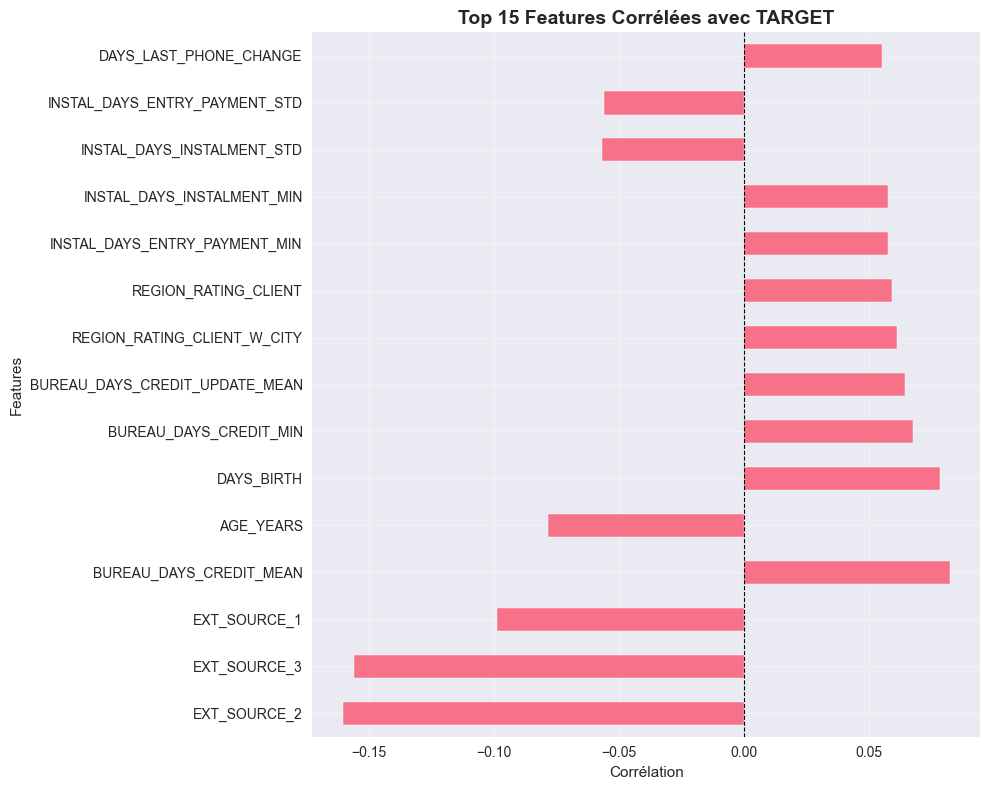

In [20]:
# Visualiser les corrélations
if 'TARGET' in df_encoded.columns:
    top_corr = correlations.drop('TARGET').abs().sort_values(ascending=False).head(15)
    
    plt.figure(figsize=(10, 8))
    correlations[top_corr.index].plot(kind='barh', figsize=(10, 8))
    plt.title('Top 15 Features Corrélées avec TARGET', fontsize=14, fontweight='bold')
    plt.xlabel('Corrélation')
    plt.ylabel('Features')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 11. Sauvegarde du Dataset Préparé

In [21]:
# Sauvegarder le dataset nettoyé et enrichi
output_path = '../data/application_train_prepared.csv'
df_encoded.to_csv(output_path, index=False)
print(f"Dataset sauvegardé dans {output_path}")
print(f"Shape final: {df_encoded.shape}")

Dataset sauvegardé dans ../data/application_train_prepared.csv
Shape final: (307511, 336)
